In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 作業一
### 使用 TensorFlow 或 PyTorch 實作類神經網路模型預測股票價格（TensorFlow 使用 Dense layer；PyTorch 使用 Linear layer）。

In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 25.3 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 5.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-cp310-cp310-linux_x86_64.whl size=317857 sha256=4538b4702bc84132c04ec40c5b464279930f3b064dbad51ffce9fcf4dbd148ee
  Stored in directory: /root/.cache/pip/wheels/8d/0e/f8/48eb93a200fca4c502d7590613616fa4d2c9533f7308f9e28a
Successfully built peewee


In [3]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [4]:
# 輸入股票代號
stock_id = "8299.TWO"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
#end = dt.date.today()
# output : 2024-09-30
end = dt.date(2024, 1, 16)
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=350)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,8299.TWO,8299.TWO,8299.TWO,8299.TWO,8299.TWO,8299.TWO
0,2023-01-31 00:00:00+00:00,358.726471,371.0,376.5,361.0,364.0,2022000
1,2023-02-01 00:00:00+00:00,355.825714,368.0,372.0,365.0,369.5,1099000
2,2023-02-02 00:00:00+00:00,356.792633,369.0,373.5,369.0,370.0,971000
3,2023-02-03 00:00:00+00:00,355.825714,368.0,371.5,364.0,370.5,824000
4,2023-02-06 00:00:00+00:00,351.958069,364.0,368.5,358.5,368.5,1074000
...,...,...,...,...,...,...,...
232,2024-01-09 00:00:00+00:00,488.007568,495.0,505.0,491.0,503.0,967000
233,2024-01-10 00:00:00+00:00,487.021698,494.0,496.0,491.0,495.0,1048000
234,2024-01-11 00:00:00+00:00,482.092316,489.0,499.0,480.0,499.0,2493000


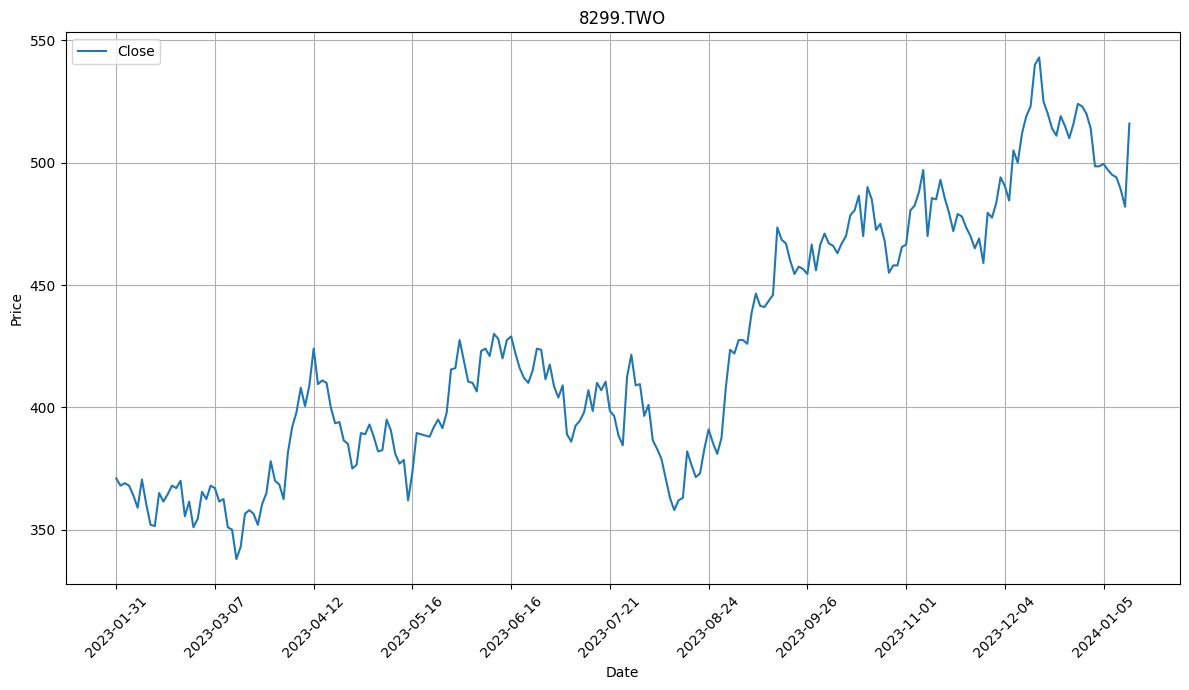

In [5]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

In [6]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.7 MB/s eta 0:00:00


In [7]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')

# 過濾掉非數字列
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
kplot_df = kplot_df[numeric_columns]

# 檢查並確保所有數據都是 float
kplot_df = kplot_df.astype(float)
kplot_df['2023-8-01':'2023-09-18'].tail()

Price,Open,High,Low,Close,Volume
Ticker,8299.TWO,8299.TWO,8299.TWO,8299.TWO,8299.TWO
Date,,,,,
2023-09-12 00:00:00+00:00,444.5,447.5,432.0,441.0,2714000.0
2023-09-13 00:00:00+00:00,443.5,446.0,434.0,443.5,1647000.0
2023-09-14 00:00:00+00:00,449.0,451.0,441.0,446.0,1702000.0
2023-09-15 00:00:00+00:00,450.0,484.5,449.5,473.5,9386000.0
2023-09-18 00:00:00+00:00,467.5,478.0,461.0,468.5,2949000.0


In [8]:
# kplot_df.fillna(0, inplace=True)  # 用 0 填補

In [9]:
kplot_df.columns
# 將 MultiIndex 轉換為單層索引
kplot_df.columns = kplot_df.columns.get_level_values(0)

# 檢查轉換後的欄位名稱
print(kplot_df.head())

Price                       Open   High    Low  Close     Volume
Date                                                            
2023-01-31 00:00:00+00:00  364.0  376.5  361.0  371.0  2022000.0
2023-02-01 00:00:00+00:00  369.5  372.0  365.0  368.0  1099000.0
2023-02-02 00:00:00+00:00  370.0  373.5  369.0  369.0   971000.0
2023-02-03 00:00:00+00:00  370.5  371.5  364.0  368.0   824000.0
2023-02-06 00:00:00+00:00  368.5  368.5  358.5  364.0  1074000.0


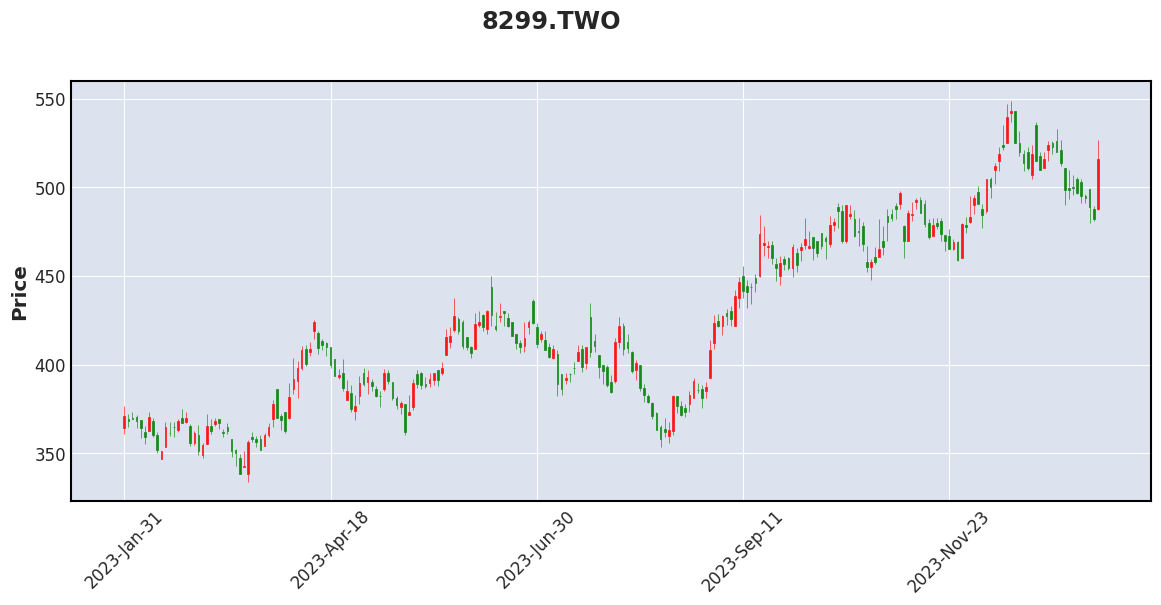

In [10]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

# 分割訓練、測試資料

In [11]:
# 資料準備
close_prices = df['Close'].values  # 把 'Close' 欄位轉換成 numpy array
train_size = int(len(close_prices) * 0.7)
train, test = close_prices[:train_size], close_prices[train_size:]


In [12]:
print(f"訓練集長度:{len(train)}")
print(f"訓練集長度:{len(test)}")

訓練集長度:165
訓練集長度:72


In [13]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import StandardScaler

In [14]:
# 標準化數據
scaler = StandardScaler()
train = scaler.fit_transform(train.reshape(-1, 1))
test = scaler.transform(test.reshape(-1, 1))

# 資料轉換成 PyTorch tensor
train_tensor = torch.tensor(train, dtype=torch.float32)
test_tensor = torch.tensor(test, dtype=torch.float32)

In [15]:
# 定義簡單的線性模型
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # 單一輸入特徵、單一輸出特徵
        self.fc2 = nn.Linear(64,32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return (self.fc3(x))

model = LinearModel()

# 定義損失函數和優化器
criterion = nn.MSELoss()  # 使用均方誤差損失
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 隨機梯度下降優化器

# 訓練模型
epochs = 500  # 訓練迭代次數
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(train_tensor)
    loss = criterion(predictions, train_tensor)  # 使用訓練資料的真實值
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 使用訓練好的模型預測測試資料
model.eval()
with torch.no_grad():
    test_predictions = model(test_tensor)

# 將結果反標準化回原始尺度
test_predictions = scaler.inverse_transform(test_predictions.numpy())

print("Test predictions:", test_predictions)

Epoch [10/500], Loss: 0.3775
Epoch [20/500], Loss: 0.1392
Epoch [30/500], Loss: 0.0444
Epoch [40/500], Loss: 0.0174
Epoch [50/500], Loss: 0.0111
Epoch [60/500], Loss: 0.0094
Epoch [70/500], Loss: 0.0086
Epoch [80/500], Loss: 0.0081
Epoch [90/500], Loss: 0.0077
Epoch [100/500], Loss: 0.0073
Epoch [110/500], Loss: 0.0069
Epoch [120/500], Loss: 0.0066
Epoch [130/500], Loss: 0.0062
Epoch [140/500], Loss: 0.0059
Epoch [150/500], Loss: 0.0056
Epoch [160/500], Loss: 0.0053
Epoch [170/500], Loss: 0.0051
Epoch [180/500], Loss: 0.0048
Epoch [190/500], Loss: 0.0046
Epoch [200/500], Loss: 0.0044
Epoch [210/500], Loss: 0.0042
Epoch [220/500], Loss: 0.0040
Epoch [230/500], Loss: 0.0038
Epoch [240/500], Loss: 0.0036
Epoch [250/500], Loss: 0.0035
Epoch [260/500], Loss: 0.0033
Epoch [270/500], Loss: 0.0032
Epoch [280/500], Loss: 0.0030
Epoch [290/500], Loss: 0.0029
Epoch [300/500], Loss: 0.0028
Epoch [310/500], Loss: 0.0027
Epoch [320/500], Loss: 0.0026
Epoch [330/500], Loss: 0.0024
Epoch [340/500], Lo

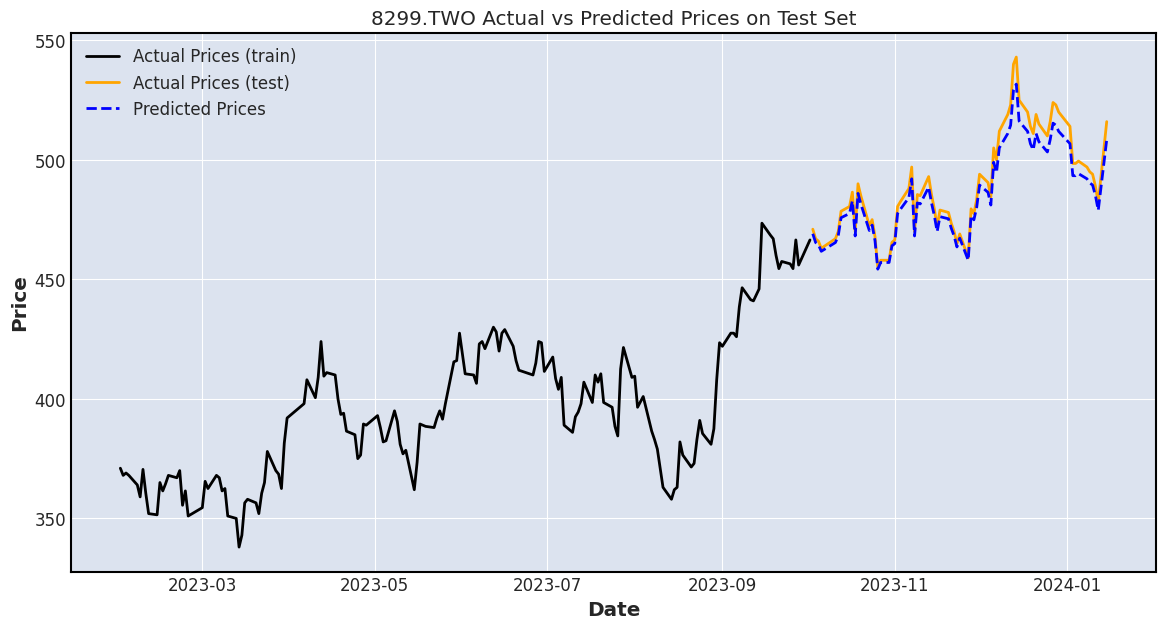

In [16]:
yhat = test_predictions  # 預測結果

# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
# 訓練集實際價格走勢
plt.plot(df['Date'][:train_size], df['Close'][:train_size], label='Actual Prices (train)', color='black', linewidth=2)
# 測試集實際價格走勢
plt.plot(df['Date'][train_size:], df['Close'][train_size:], label='Actual Prices (test)', color='orange', linewidth=2)
# 測試集預測價格走勢
plt.plot(df['Date'][train_size:], yhat, label='Predicted Prices', linestyle='--', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('8299.TWO Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 作業二
### 使用 TensorFlow 或 PyTorch 實作 CNN 捕捉 K 線趨勢，並預測股價漲跌（分類任務）。

### 使用更多資料

In [17]:
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [18]:
# 輸入股票代號
stock_id = "8299.TWO"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
#end = dt.date.today()
# output : 2024-09-30
end = dt.date(2024, 1, 16)
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=10000)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()
df.columns = df.columns.droplevel(1)
df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2007-12-31 00:00:00+00:00,84.877670,167.630066,167.630066,163.016388,165.323227,4749362
1,2008-01-02 00:00:00+00:00,87.603088,173.012680,179.164246,165.323227,166.476639,9669088
2,2008-01-03 00:00:00+00:00,85.656372,169.167953,171.474792,163.785339,166.861115,4246076
3,2008-01-04 00:00:00+00:00,81.762878,161.478500,172.243729,161.478500,166.861115,4015890
4,2008-01-07 00:00:00+00:00,76.117363,150.328796,153.020096,150.328796,151.097733,1539771
...,...,...,...,...,...,...,...
3934,2024-01-09 00:00:00+00:00,488.007568,495.000000,505.000000,491.000000,503.000000,967000
3935,2024-01-10 00:00:00+00:00,487.021698,494.000000,496.000000,491.000000,495.000000,1048000
3936,2024-01-11 00:00:00+00:00,482.092316,489.000000,499.000000,480.000000,499.000000,2493000
3937,2024-01-12 00:00:00+00:00,475.191223,482.000000,489.500000,481.000000,488.000000,1476000


In [19]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2007-12-31 00:00:00+00:00,84.877670,167.630066,167.630066,163.016388,165.323227,4749362
1,2008-01-02 00:00:00+00:00,87.603088,173.012680,179.164246,165.323227,166.476639,9669088
2,2008-01-03 00:00:00+00:00,85.656372,169.167953,171.474792,163.785339,166.861115,4246076
3,2008-01-04 00:00:00+00:00,81.762878,161.478500,172.243729,161.478500,166.861115,4015890
4,2008-01-07 00:00:00+00:00,76.117363,150.328796,153.020096,150.328796,151.097733,1539771
...,...,...,...,...,...,...,...
3934,2024-01-09 00:00:00+00:00,488.007568,495.000000,505.000000,491.000000,503.000000,967000
3935,2024-01-10 00:00:00+00:00,487.021698,494.000000,496.000000,491.000000,495.000000,1048000
3936,2024-01-11 00:00:00+00:00,482.092316,489.000000,499.000000,480.000000,499.000000,2493000
3937,2024-01-12 00:00:00+00:00,475.191223,482.000000,489.500000,481.000000,488.000000,1476000


In [20]:
# 設置移動平均線的標籤
def create_labels(data, short_window=5, long_window=10):
    data = data.copy()  # 避免 SettingWithCopyWarning
    data['5_MA'] = data['Close'].rolling(window=short_window).mean()
    data['10_MA'] = data['Close'].rolling(window=long_window).mean()
    data['Label'] = np.where(data['5_MA'] > data['10_MA'], 1, 0)  # 標註「漲」或「跌」
    data = data.dropna()  # 移除含有 NaN 的行
    return data

# 確保在標準化之前移除所有 NaN 值
df = create_labels(df)
df = df.dropna(subset=['Open', 'High', 'Low', 'Close'])

# 將資料標準化並生成影像樣本
def preprocess_data(data, N):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close']])
    samples, labels = [], []
    
    for i in range(N, len(scaled_data)):
        samples.append(scaled_data[i-N:i, :])  # N 天的資料
        labels.append(data['Label'].values[i])  # 對應的標籤
    
    return np.array(samples), np.array(labels)

N = 20  # 每 20 天為一個樣本
samples, labels = preprocess_data(df, N)


In [21]:
class StockDataset(Dataset):
    def __init__(self, samples, labels):
        self.samples = samples
        self.labels = labels

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return torch.tensor(self.samples[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

dataset = StockDataset(samples, labels)
train_size = int(0.8 * len(dataset))
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [22]:
class CNN(nn.Module):
    def __init__(self, N):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 1), stride=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 1), stride=1)
        # 根據輸入形狀計算 fc1 的輸入大小
        self.fc1 = nn.Linear(64 * (N - 4) * 4, 128) 
        self.fc2 = nn.Linear(128, 2)  # 二分類輸出 (漲或跌)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        #print(f'After conv1: {x.shape}')  # 印出 conv1 的輸出形狀
        
        x = torch.relu(self.conv2(x))
        #print(f'After conv2: {x.shape}')  # 印出 conv2 的輸出形狀
        
        x = x.view(x.size(0), -1)  # 展平
        #print(f'Flattened shape: {x.shape}')  # 印出展平後的形狀
        
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# 假設 N = 20
N = 20
model = CNN(N)

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練過程
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1)  # 添加 channel 維度 [batch_size, 1, N, 4]
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")


Epoch [1/20], Loss: 0.6919
Epoch [2/20], Loss: 0.6834
Epoch [3/20], Loss: 0.6049
Epoch [4/20], Loss: 0.4470
Epoch [5/20], Loss: 0.3285
Epoch [6/20], Loss: 0.2571
Epoch [7/20], Loss: 0.2352
Epoch [8/20], Loss: 0.2209
Epoch [9/20], Loss: 0.2276
Epoch [10/20], Loss: 0.2067
Epoch [11/20], Loss: 0.2044
Epoch [12/20], Loss: 0.1987
Epoch [13/20], Loss: 0.1935
Epoch [14/20], Loss: 0.1861
Epoch [15/20], Loss: 0.1805
Epoch [16/20], Loss: 0.1921
Epoch [17/20], Loss: 0.1806
Epoch [18/20], Loss: 0.1865
Epoch [19/20], Loss: 0.2022
Epoch [20/20], Loss: 0.2000


In [24]:
# 測試過程
model.eval()  # 設定模型為評估模式
total_loss = 0
correct = 0
total = 0

with torch.no_grad():  # 不需要計算梯度
    for inputs, labels in test_loader:
        inputs = inputs.unsqueeze(1)  # 添加 channel 維度 [batch_size, 1, N, 4]
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # 計算損失
        total_loss += loss.item()  # 累加損失
        
        # 計算準確度
        _, predicted = torch.max(outputs.data, 1)  # 獲取預測類別
        total += labels.size(0)  # 總樣本數
        correct += (predicted == labels).sum().item()  # 正確預測數

# 計算並印出測試結果
avg_loss = total_loss / len(test_loader)
accuracy = correct / total
print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}')


Test Loss: 0.1693, Test Accuracy: 0.9399


In [26]:
# 選擇第一張圖片並增加 batch 維度
test_data = inputs[9].unsqueeze(0)  # [1, C, H, W]

# 確保 test_image 的形狀是正確的
print(f"Test image shape: {test_data.shape}")  # 應該是 [1, 1, N, 4]

# 使用模型進行預測
model.eval()  # 設置模型為評估模式
with torch.no_grad():  # 在評估時不計算梯度
    output = model(test_data)

# 獲取預測結果
kdata, predicted = torch.max(output, 1)  # 獲取預測的類別

# 打印預測類別和實際標籤
print(f"Predicted: {predicted.item()}, Actual: {labels[0].item()}")

Test image shape: torch.Size([1, 1, 20, 4])
Predicted: 1, Actual: 1


(20, 4)


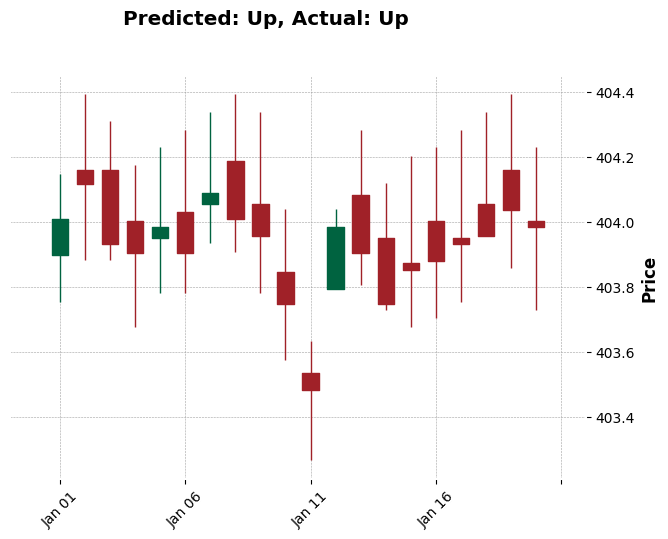

In [27]:
# 假設 test_data 是你的預測結果

test_data_np = test_data.numpy().squeeze(0).squeeze(0)  # 去掉多餘的維度，變成 (20, 4)
print(test_data_np.shape)  # 應該是 (20, 4)
test_data = scaler.inverse_transform(test_data_np)


# 提取開盤價、最高價、最低價、收盤價
open_price = test_data[:, 0]
high_price = test_data[:, 1]
low_price = test_data[:, 2]
close_price = test_data[:, 3]

# 創建日期索引，這裡我們用簡單的整數索引代替實際日期
dates = pd.date_range(start='2023-01-01', periods=open_price.shape[0], freq='D')

# 創建 DataFrame
df = pd.DataFrame({
    'Open': open_price,
    'High': high_price,
    'Low': low_price,
    'Close': close_price
}, index=dates)

# 繪製 K 線圖
mpf.plot(df, type='candle', style='charles', title=f"Predicted: {'Up' if predicted.item() == 1 else 'Down'}, Actual: {'Up' if labels[0].item() == 1 else 'Down'}", ylabel='Price', volume=False)